# cheat sheet для анализа данных на питоне


## импорты

In [1]:
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## pandas

### создание таблиц

In [2]:
# из двумерного массива
pd.DataFrame(np.random.randn(3, 4), columns=list('ABCD'))

,A,B,C,D
0,-0.273473,-0.568884,-0.829916,0.277434
1,-0.976353,0.649631,-1.366004,-0.058998
2,0.350962,-0.603308,0.435000,-0.226294


In [3]:
pd.DataFrame({
    'A': np.random.randn(3),
    'B': np.random.randn(3),
    'C': np.random.randn(3),
    'D': np.random.randn(3),
})

,A,B,C,D
0,-0.422718,-1.225112,0.353962,0.140910
1,0.115436,2.110176,0.044151,-0.366427
2,1.191836,0.830471,-0.941274,0.780648


### Полезные функции

In [4]:
df = pd.DataFrame(np.random.randn(3, 4), columns=list('ABCD'))
df

,A,B,C,D
0,0.541666,-0.307310,-1.398913,-0.810812
1,-0.562352,1.276481,-0.229750,-0.397625
2,-1.767695,-1.076720,0.641380,2.147428


In [5]:
df.head(2)

,A,B,C,D
0,0.541666,-0.307310,-1.398913,-0.810812
1,-0.562352,1.276481,-0.229750,-0.397625


In [6]:
df.sort_values(by='A')

,A,B,C,D
2,-1.767695,-1.076720,0.641380,2.147428
1,-0.562352,1.276481,-0.229750,-0.397625
0,0.541666,-0.307310,-1.398913,-0.810812


In [7]:
df.loc[:1, ['A', 'B']]

,A,B
0,0.541666,-0.307310
1,-0.562352,1.276481


In [8]:
df.iloc[1, 1]

1.276481086921052

In [9]:
df[df.A > df.A.mean()]

,A,B,C,D
0,0.541666,-0.307310,-1.398913,-0.810812
1,-0.562352,1.276481,-0.229750,-0.397625


In [10]:
df.copy()

,A,B,C,D
0,0.541666,-0.307310,-1.398913,-0.810812
1,-0.562352,1.276481,-0.229750,-0.397625
2,-1.767695,-1.076720,0.641380,2.147428


### Обработка пропусков

In [11]:
df_nan = df.copy()
df_nan.iloc[1, 1] = np.NaN
df_nan

,A,B,C,D
0,0.541666,-0.30731,-1.398913,-0.810812
1,-0.562352,NaN,-0.229750,-0.397625
2,-1.767695,-1.07672,0.641380,2.147428


In [12]:
df_nan.isna()

,A,B,C,D
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False


In [13]:
df_nan.fillna(value=3)

,A,B,C,D
0,0.541666,-0.30731,-1.398913,-0.810812
1,-0.562352,3.00000,-0.229750,-0.397625
2,-1.767695,-1.07672,0.641380,2.147428


## визуализация данных

In [14]:
grid = np.linspace(start=-1, stop=1, num=100)
data = grid ** 2

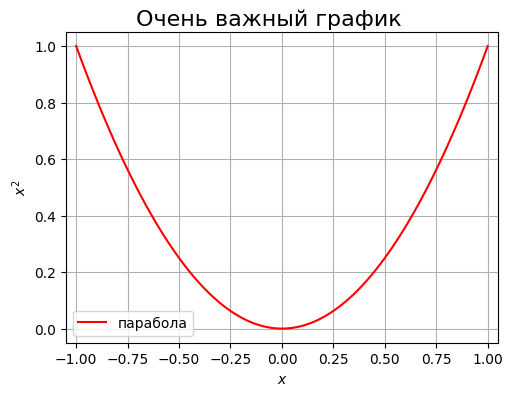

In [15]:
plt.figure(figsize=(5, 4))
sns.lineplot(x=grid, y=data, color='red', label='парабола')
plt.suptitle('Очень важный график', fontsize=16, y=.93)
plt.legend(fontsize=10)
plt.xlim([-1.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid()
plt.tight_layout()
plt.xlabel('$x$')
plt.ylabel('$x^2$')
plt.show()

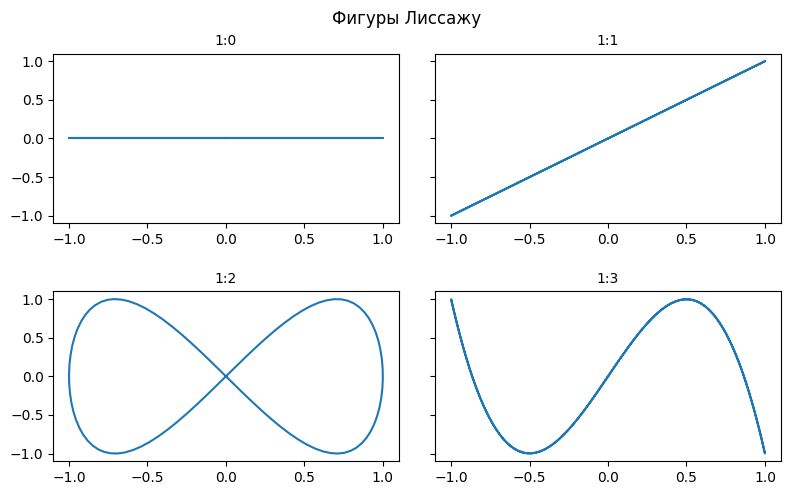

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(8, 5), sharey=True)
axes = axes.reshape(-1)
fig.suptitle('Фигуры Лиссажу')
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)

for subplot_id, ax in zip(range(len(axes)), axes):
    ax.set_title(f'1:{subplot_id}', fontsize=10)
    time = np.linspace(start=0, stop=2 * np.pi, num=100)
    x = np.sin(time)
    y = np.sin(time * subplot_id)
    ax.plot(x, y)